<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Kohler-problem" data-toc-modified-id="Kohler-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kohler problem</a></span></li><li><span><a href="#Find-haze-particle-equilibrium-radius-at-S=0.9" data-toc-modified-id="Find-haze-particle-equilibrium-radius-at-S=0.9-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Find haze particle equilibrium radius at S=0.9</a></span></li></ul></div>

# Kohler problem

1) Plot the Kohler curve for the aerosol on page 2 of the Kohler notes

In [6]:
from a405.thermo.constants import constants as c
import numpy as np
from matplotlib import pyplot as plt
Tinit=c.Tc + 15 #Temperature K
Sinit=0.9 #e/es
Ms=132 #ammonium sulphae kg/Kmole
Mw=18. #water kg/Kmole
Sigma=0.075  #N/m
vanHoff=3. #van hoff for ammonium bisulphate
#calculate kohler coefficients:
a=(2.*Sigma)/(c.Rv*Tinit*c.rhol)  #curvature term
mass_aero = 1.e-19  #kg
b=(vanHoff*Mw)/((4./3.)*np.pi*c.rhol*Ms)*mass_aero   #solution term
rcrit = (3*b/a)**0.5  #critical radius
print('critical radius = {:5.3f} microns'.format(rcrit*1.e6))

critical radius = 0.161 microns


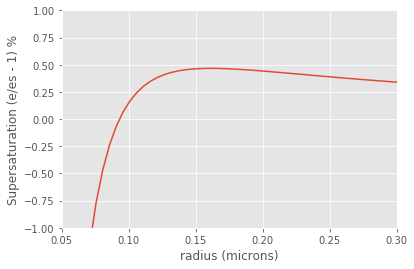

In [7]:
def find_S(r):
    S= 1 + a/r - b/r**3
    return S

    
plt.close('all')
import matplotlib
matplotlib.style.use('ggplot')
fig,ax = plt.subplots(1,1)
rvals=np.linspace(0.05,0.3,50)*1.e-6
Svals = find_S(rvals)
ax.plot(rvals*1.e6,(Svals -1)*1.e2)
out=ax.set(ylim=[-1,1],xlim = [0.05,0.3],
       ylabel='Supersaturation (e/es - 1) %',xlabel='radius (microns)')


# Find haze particle equilibrium radius at S=0.9

In [8]:
def find_diff(r,S_target):
    return S_target - find_S(r)

S_target = 0.90
r_start = 0.1e-6
from a405.thermo.rootfinder import find_interval, fzero
brackets = np.array(find_interval(find_diff,r_start,S_target))
print('left bracket = {:8.3e} microns, right bracket={:8.3e} microns'.format(*(brackets*1.e6)))

equil_rad = fzero(find_diff,brackets,S_target)
print('equlibrium radius at S={} is {:5.3f} microns'.format(S_target,equil_rad*1.e6))


left bracket = 3.600e-02 microns, right bracket=1.640e-01 microns
equlibrium radius at S=0.9 is 0.043 microns
